In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_excel('Adidas US Sales Datasets.xlsx', header=4 )

df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

In [15]:
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [10]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [11]:
df.shape

(9648, 13)

In [ ]:
df.describe()

,count,mean,min,25%,50%,75%,max,std
Retailer ID,9648.0,1173849.72357,1128299.0,1185732.0,1185732.0,1185732.0,1197831.0,26360.377309
Invoice Date,9648,2021-05-10 15:20:44.776119296,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
Price per Unit,9648.0,45.216625,7.0,35.0,45.0,55.0,110.0,14.705397
Units Sold,9648.0,256.930037,0.0,106.0,176.0,350.0,1275.0,214.25203
Total Sales,9648.0,93273.4375,0.0,4254.5,9576.0,150000.0,825000.0,141916.016727
Operating Profit,9648.0,34425.244761,0.0,1921.7525,4371.42,52062.5,390000.0,54193.113713
Operating Margin,9648.0,0.422991,0.1,0.35,0.41,0.49,0.8,0.097197


In [14]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [16]:
#  Ortalama fiyat

df['Price per Unit'].mean()

np.float64(45.21662520729685)

In [27]:
df["Retailer"].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [28]:
df["City"].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [29]:
df["Product"].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [36]:
df.groupby('Retailer')["Operating Profit"].mean().reset_index()

,Retailer,Operating Profit
0,Amazon,30367.232150
1,Foot Locker,30611.348051
2,Kohl's,35739.080175
3,Sports Direct,36581.178622
4,Walmart,41185.387556
5,West Gear,36085.877498


In [ ]:
df.groupby('Product')['Units Sold'].sum().idxmax()

"Men's Street Footwear"

In [42]:
df.groupby('Retailer')['Operating Profit'].sum().idxmax()

'West Gear'

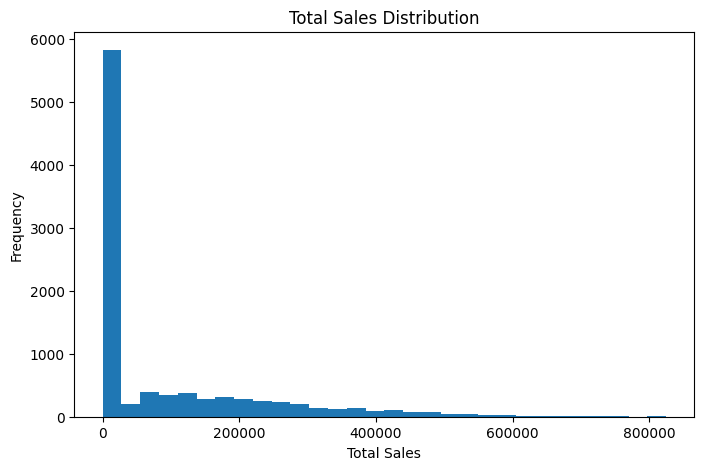

In [44]:
plt.figure(figsize=(8,5))
plt.hist(df['Total Sales'], bins=30)
plt.title("Total Sales Distribution")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

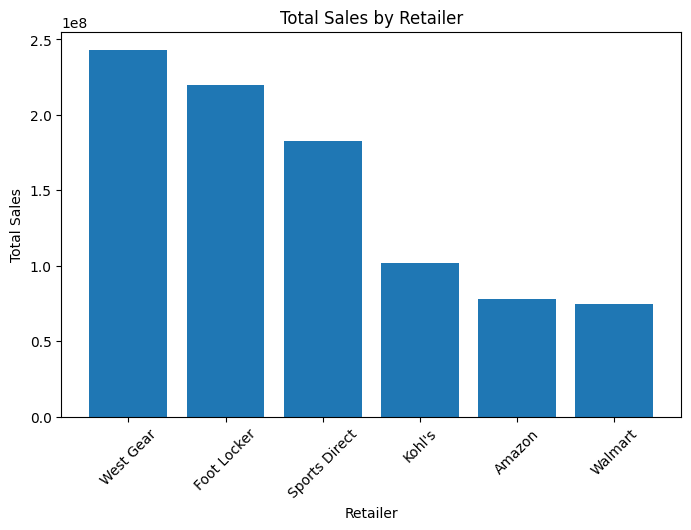

In [47]:
retailer_sales = (
    df.groupby('Retailer')['Total Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
plt.bar(retailer_sales.index, retailer_sales.values)
plt.title("Total Sales by Retailer")
plt.xlabel("Retailer")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


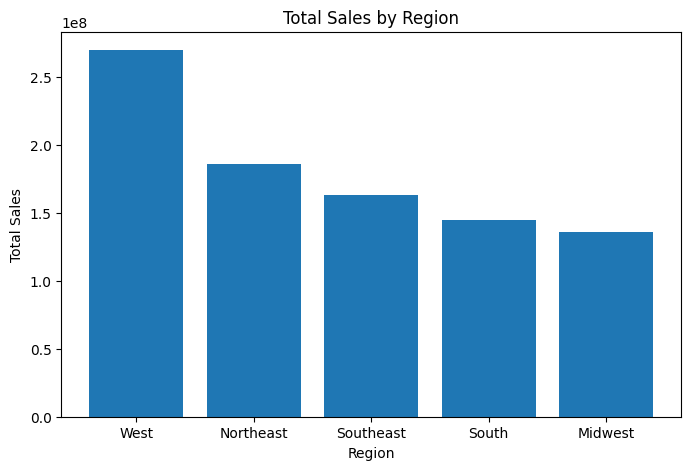

In [49]:
region_sales = (
    df.groupby('Region')['Total Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
plt.bar(region_sales.index, region_sales.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


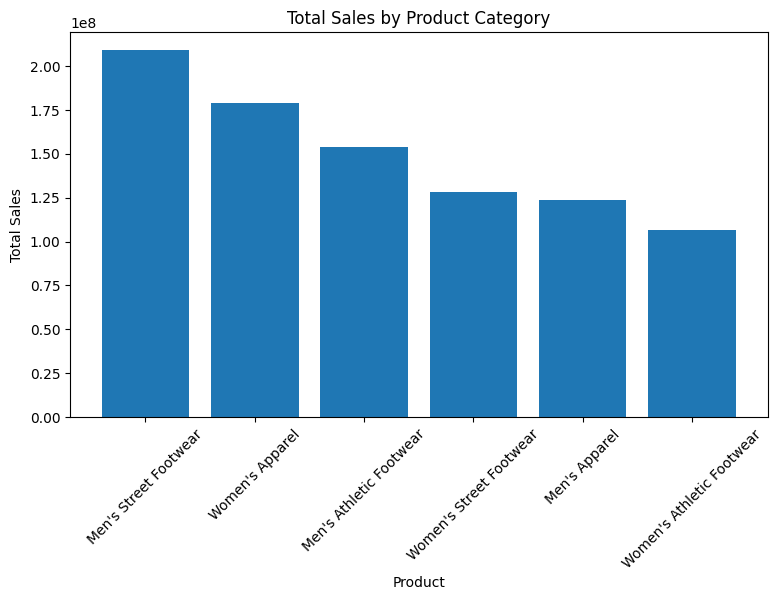

In [50]:
product_sales = (
    df.groupby('Product')['Total Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(9,5))
plt.bar(product_sales.index, product_sales.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [52]:
sales_method= (
    df.groupby('Sales Method')['Total Sales']
    .sum()
    .sort_values(ascending=False)
)

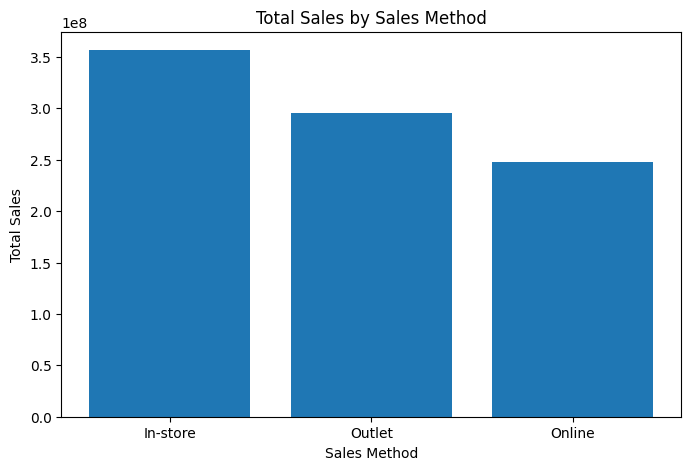

In [53]:
plt.figure(figsize=(8,5))
plt.bar(sales_method.index, sales_method.values)
plt.title("Total Sales by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Total Sales")
plt.show()